In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
#import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

## Load in Testing1 Data

In [ ]:
pickle_in = open("testing_images1_20CAT.pickle", 'rb')
X_test1 = pickle.load(pickle_in)

pickle_in = open("testing_labels1_20CAT.pickle", 'rb')
y_test1 = pickle.load(pickle_in)

In [2]:
WorkingDir = 'C:\\Users\\Fletcher\\Documents\\McDaniel\\Summer 2019 research\\Python Code\\Images-Videos\\'
TestFrames1DIR = WorkingDir + 'TestFrames1.1\\'
TestFrames2DIR = WorkingDir + 'TestFrames2.1\\'
TestFrames3DIR = WorkingDir + 'TestFrames3.1\\'
TrainFrames1DIR = WorkingDir + 'TrainFrames1.1\\'
TrainFrames2DIR = WorkingDir + 'TestFrames2.1\\'
TrainFrames3DIR = WorkingDir + 'TestFrames3.1\\'

CATEGORIES = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching',
              'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair',
              'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'Breaststroke',
              'BrushingTeeth', 'CleanandJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen',
              'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl',
              'GolfSwing', 'Haircut', 'HammerThrow', 'Hammering', 'HandstandPushups', 'HandstandWalking',
              'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow',
              'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Knitting', 'LongJump', 'Lunges',
              'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing',
              'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PlayingCello', 'PlayingDaf',
              'PlayingDhol', 'PlayingFlute', 'PlayingSitar', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch',
              'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'ShavingBeard',
              'Shotput', 'SkateBoarding', 'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty',
              'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot', 'TaiChi', 'TennisSwing',
              'ThrowDiscus', 'TrampolineJumping', 'Typing', 'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog',
              'WallPushups', 'WritingOnBoard', 'YoYo']


In [3]:
def load_videos(directory, max_categories=20): # by default uses first [max_categories] categories
    data = []
    cat_num = 0
    
    for category in CATEGORIES:
        if(cat_num >= max_categories):
            break
        pathCat = os.path.join(directory, category)
        pathVid = directory + str(category)

        print( str(cat_num) + ': ' + category )
        for video in os.listdir(pathVid):
            pathImg = pathVid + '/' + str(video)
            
            for img in os.listdir(pathImg):
                img_array = cv2.imread(pathImg + '/' + img)
                data.append([np.array(img_array), cat_num])
            
        cat_num += 1
    print('done')
    return data

In [4]:
def sort_by_frame(testing_data):
    X = []
    y = []


    for features, label in testing_data:
        # put data from 0-255 into scale of 0-1
        X.append(features / 255.0)
        y.append(label)


    X = np.array(X) # convert to numpy array

    i=0
    # 20 arrays
    # X2[0] holds frame 0 of each video, X2[1] holds frame 1, etc.
    X2 = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

    # holds the category tag of the videos; y2[0] is for the 0th frames, etc.
    y2 = []

    # split each viedo along the columns of X2
    for frame in X:
        X2[ i % 20 ].append(frame)

        if i % 20 == 0:
            # add the video's tag to y2
            y2.append(y[i]) 

        i+=1
        if i % 1000 == 0:
            print('frame ' + str(i) + ' processed')

    X = None # free up storage

    print('done')
    return X2, y2

In [5]:
testing_data1 = load_videos(TestFrames1DIR)

0: ApplyEyeMakeup
1: ApplyLipstick
2: Archery
3: BabyCrawling
4: BalanceBeam
5: BandMarching
6: BaseballPitch
7: Basketball
done


In [6]:
X_test1, y_test1 = sort_by_frame(testing_data1)
testing_data1 = None # free up storage

frame 1000 processed
frame 2000 processed
frame 3000 processed
done


In [ ]:
pickle_out = open('testing_images1_20CAT.pickle', 'wb')
pickle.dump(X_test1, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open('testing_labels1_20CAT.pickle', 'wb')
pickle.dump(y_test1, pickle_out, protocol=4)
pickle_out.close()

## Load in Testing2 Data

In [4]:
pickle_in = open("testing_images2_20CAT.pickle", 'rb')
X_test2 = pickle.load(pickle_in)

pickle_in = open("testing_labels2_20CAT.pickle", 'rb')
y_test2 = pickle.load(pickle_in)

In [7]:
testing_data2 = load_videos(TestFrames2DIR)

0: ApplyEyeMakeup
1: ApplyLipstick
2: Archery
3: BabyCrawling
4: BalanceBeam
5: BandMarching
6: BaseballPitch
7: Basketball
done


In [8]:
X_test2, y_test2 = sort_by_frame(testing_data2)
testing_data2 = None

frame 1000 processed
frame 2000 processed
done


In [ ]:
pickle_out = open('testing_images2_20CAT.pickle', 'wb')
pickle.dump(X_test2, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open('testing_labels2_20CAT.pickle', 'wb')
pickle.dump(y_test2, pickle_out, protocol=4)
pickle_out.close()

## Load in Testing3 Data

In [5]:
pickle_in = open("testing_images3_20CAT.pickle", 'rb')
X_test3 = pickle.load(pickle_in)

pickle_in = open("testing_labels3_20CAT.pickle", 'rb')
y_test3 = pickle.load(pickle_in)

In [9]:
testing_data3 = load_videos(TestFrames3DIR)

0: ApplyEyeMakeup
1: ApplyLipstick
2: Archery
3: BabyCrawling
4: BalanceBeam
5: BandMarching
6: BaseballPitch
7: Basketball
done


In [10]:
X_test3, y_test3 = sort_by_frame(testing_data3)
testing_data3 = None

frame 1000 processed
frame 2000 processed
frame 3000 processed
done


## The Model

In [11]:
inputs = [''] * 20
xArray = [None] * 20

for i in range(20):
    inputs[i] = (keras.Input(shape=(227,227,3)))
    xArray[i] = (tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), input_shape = (227,227,3))) (inputs[i])

added = tf.keras.layers.Add()(xArray)
print(inputs[0])
print(xArray[0])
print(added)

xx = tf.keras.layers.BatchNormalization()(added)

xx = tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2))(xx)
    
xx = tf.keras.layers.Conv2D(256, (5,5), strides=(1,1))(xx)
xx = tf.keras.layers.BatchNormalization()(xx)
xx = tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2))(xx)
    
xx = tf.keras.layers.Conv2D(384, (3,3), strides=(1,1))(xx)
xx = tf.keras.layers.Conv2D(384, (3,3), strides=(1,1))(xx)
xx = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1))(xx)
    
xx = tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2))(xx)

#dropout
   
xx = tf.keras.layers.Flatten()(xx)

xx = tf.keras.layers.Dense(2048, activation=tf.nn.relu)(xx)
xx = tf.keras.layers.Dense(2048, activation=tf.nn.relu)(xx)
xx = tf.keras.layers.Dense(2048, activation=tf.nn.relu)(xx)

outputs = tf.keras.layers.Dense(8, activation=tf.nn.softmax)(xx) # should be 101

from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Tensor("input_1:0", shape=(?, 227, 227, 3), dtype=float32)
Tensor("conv2d/BiasAdd:0", shape=(?, 55, 55, 96), dtype=float32)
Tensor("add/add_18:0", shape=(?, 55, 55, 96), dtype=float32)


In [12]:
# model.summary()

In [13]:
history = model.fit(X_test1,
                    y_test1,
                    batch_size=1,
                    epochs=1,
                    shuffle=False,
                    validation_split=0)

152/152 [==============================] - 182s 1s/sample - loss: 0.4929 - acc: 0.9474


In [ ]:
history = model.fit(X_test2
                    y_test2,
                    batch_size=1,
                    epochs=1,
                    shuffle=False,
                    validation_split=0)

 35/370 [=>............................] - ETA: 2:14 - loss: 1.0464 - acc: 0.8857

In [14]:
test_scores = model.evaluate(X_test2,
                             y_test2,
                             batch_size=1,
                             verbose=0)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Test loss: 10.075228869428217
Test accuracy: 0.11724138


# Lets try some predictions

In [30]:
training_data1 = load_videos(TrainFrames1DIR)

ApplyEyeMakeup
ApplyLipstick
Archery


In [31]:
X_train1, y_train1 = sort_by_frame(training_data1)
print(X_train1.shape)

(2860, 227, 227, 3)


In [40]:
PredictIMG = X_train1     

predict = model.predict(PredictIMG)


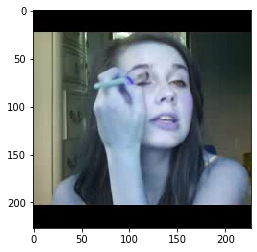

[1.46840717e-08 1.24512338e-08 3.43629436e-09 1.33156401e-08
 1.47891379e-08 6.65284361e-08 5.90926374e-09 1.55863980e-08
 3.39708492e-08 6.06374595e-09 5.78174522e-08 2.21838565e-08
 8.41181205e-08 2.60559290e-07 8.30688862e-07 1.34406193e-08
 3.75202376e-06 4.75775323e-06 1.16579520e-06 9.99988914e-01
 2.44084220e-09 4.33996616e-09 2.33002879e-08 1.08895915e-08
 8.07585021e-09 1.24361788e-09 7.54402141e-09 2.48835814e-08
 1.59436659e-08 1.71025027e-09]


In [43]:
plt.imshow(x0_train1[0])
plt.show()
print(predict[0])